# 3 Activation Functions and Vanishing Gradient

The purpose of this task is to get familiar with different activation functions commonly used in artificial neural networks, as well as with some particular problems associated with some of the functions. We will mostly use the common libraries that you have learned to work with in previous assignments for this task.

In [43]:
# basic import packages
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 3.1 Activation Functions
Your first task will be to give a brief overview of the most popular activation functions used in machine learning, both in terms of mathematical definition and plotting. 

_As usual, for all plots you will produce, keep in mind to add title, proper axis ticks, and axis labels to the plots and make sure they're readable and comprehensible. Whenever you have to plot two different lines, please use different colors for them and add a legend to the plot._

### Task 3.1.1 Logistic function
The logistic function is one particular Sigmoid activation function. Given some neuron input $x$, it is defined by the formula $$f(x) = \frac{1}{1+e^{-x}}$$

1.) Implement a python function that calculates the logistic function, then

2.) Implement the derivative of the logistic function (either you look it up online or you try to derive the equation yourself), and finally

3.) Write a function that plots both the logistic function $f(x)$ as well as its derivative/gradient $\frac{\partial f(x)}{\partial x}$ for the some given interval of input values, denoted by the lower bound $x_{\text{min}}$ and the upper bound $x_{\text{max}}$. As an example, given the function call ```plot_logistic(-8, 8)```, we want to plot the function and its gradient for the interval $x \in \{-8, 8\}$. Use the third code box below to test your plots against different combinations of input.

In [44]:
def logistic(x):
    
    return 1/(1 + np.exp(-x))

In [45]:
def logistic_grad(x):
    # your code here
    return np.exp(-x)/((1 + np.exp(-x)))**2

In [46]:
def plot_logistic(x_min, x_max):
    x = np.linspace(x_min, x_max, 100)
    y = logistic(x)
    dy = logistic_grad(x)
    plt.plot(x, y, label='logistic')
    plt.plot(x, dy, label='logistic gradient')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Logistic Function')
    plt.show()

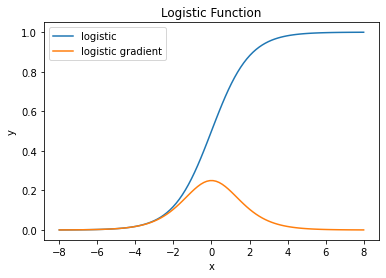

In [47]:
# Use this function call to test your code for different interval boundaries.
plot_logistic(-8, 8)

### Task 3.1.2 Hyperbolic tangent

The hyperbolic tangent $(tanh)$ is another type of Sigmoid activation function. Given some neuron input $x$, it is defined by the formula $$f(x) = tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

1.) Implement a python function that calculates the hyperbolic tangent, then

2.) Implement the derivative of the hyperbolic tangent (either you look it up online or you try to derive the equation yourself), and finally

3.) Write a function that plots both the hyperbolic tangent $f(x)$ as well as its derivative/gradient $\frac{\partial f(x)}{\partial x}$ for the some given interval of input values, denoted by the lower bound $x_{\text{min}}$ and the upper bound $x_{\text{max}}$. As an example, given the function call ```plot_tanh(-8, 8)```, we want to plot the function and its gradient for the interval $x \in \{-8, 8\}$. Use the third code box below to test your plots against different combinations of input.

In [48]:
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

In [49]:
def tanh_grad(x):
    return (4* np.exp(2*x))/(np.exp(2*x) + 1)**2

In [50]:
def plot_tanh(x_min, x_max):
    x = np.linspace(x_min, x_max, 100)
    y = tanh(x)
    dy = tanh_grad(x)
    plt.plot(x, y, label='tanh')
    plt.plot(x, dy, label='tanh gradient')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Tanh Function')
    plt.show()

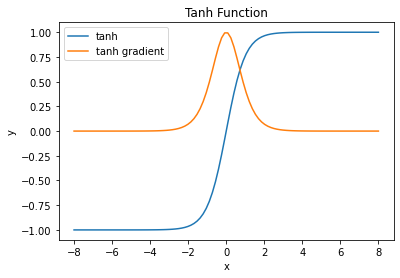

In [51]:
# Use this function call to test your code for different interval boundaries.
plot_tanh(-8, 8)

### Task 3.1.3 Rectified Linear Unit
The Rectified Linear Unit (ReLU) is another well-known actiavtion function used in neural networks. Given some neuron input $x$, it is defined by the formula 

$$f(x) = \begin{cases}
      x, & \text{if} \; x>0 \\
      0, & \text{otherwise}
    \end{cases}$$

1.) Implement a python function that calculates the ReLU function, then

2.) implement the derivative of the ReLU function (either you look it up online or you try to derive the equation yourself), and finally

3.) write a function that plots both the ReLU function $f(x)$ as well as its derivative/gradient $\frac{\partial f(x)}{\partial x}$ for the some given interval of input values, denoted by the lower bound $x_{\text{min}}$ and the upper bound $x_{\text{max}}$. As an example, given the function call ```plot_relu(-8, 8)```, we want to plot the function and its gradient for the interval $x \in \{-8, 8\}$. Use the third code box below to test your plots against different combinations of input.

In [52]:
def relu(x):
    return np.where(x > 0,x,0)

In [53]:
def relu_grad(x):
    # your code here
    return np.where(x > 0,1,0)

In [54]:
def plot_relu(x_min, x_max):
    x = np.linspace(x_min, x_max, 1000)
    y = relu(x)
    dy = relu_grad(x)
    plt.plot(x, y, label='relu')
    plt.plot(x, dy, label='relu gradient')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('ReLU Function')
    plt.show()

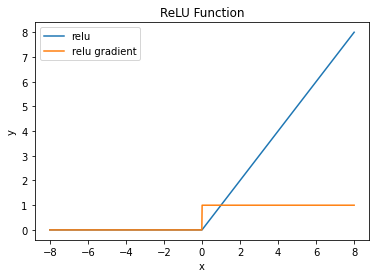

In [55]:
# Use this function call to test your code for different interval boundaries.
plot_relu(-8, 8)

## Task 3.2 Vanishing Gradients

Explain the problem of **vanishing gradients** in your own words by taking a look at the plots you just generated above and answering the questions below:

- When can vanishing gradients occur?
- Assuming our input values are positive, which activation functions are prone to vanishing gradients, and why?
- Which layers in a feed-forward neural network are most affected by vanishing gradients?
- Considering the causes of vanishing gradients, what could instead cause the **exploding gradients** problem in neural networks?

**ANSWER:**

> The problem of vanishing gradients is when the gradient of the activation 
> function is zero or close to zero for certain input, thus resulting in no 
> change in the corresponding weight during the backpropagation. 
> This can happen when the activation function is linear, such as we can see 
> for the ReLU function, or even for sigmoid functions (like tanh or logistic).
> For only positive values the problem woudln't occur for the ReLU function,
> but still for the sigmoid function, because the gradient of the sigmoid is 
> close to zero from around x > 6.
> The biggest effect of this is on the first layers of a neural network.
> The problem of "exploding gradients" is when the gradient of the activation 
> function is very high, resulting in the weight values taking large steps and 
> thus exploding, and potentially missing the minimum in the loss function. 
